# Movies Recommendation System 

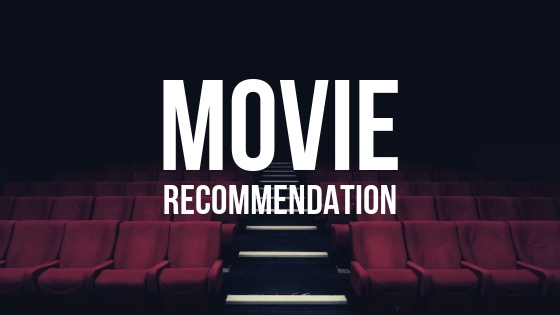

**-** Made by **Ahmed Fersi**

**-** Instructor **Soulaima ben Youssef**

**-** As Final part of the Program **the introduction of Artificial Intelligence** on **GOMYCODE** 

# Summary 
**1. Project Introduction**

    1.1. About the Project 
    1.2. Types of Recommendation 
    1.3. Explaning Dataset Features
**2.Loading Dataset** 

**3.Exploring the Dataset** 

**4.Preprocessing**

**5.Visualisation**

**6.Applying recommendation Types**

    6.1. Demographic Filtering
    6.2. Content Based Filtering

## 1. Project Introduction 

### 1.1. About the Project
**-** In this project i will introduce you a Movie Recommendation System guided by Unsupervised Learning in Machine Learning with Python language .

**-** Recommendation Systems are a type of **information filtering** systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

**-** They are used to predict the **rating** or **preference** that a user would give to an item. Almost every **major tech company** has applied them in some form or the other: **Amazon** uses it to suggest products to customers, **YouTube** uses it to decide which video to play next on autoplay, and **Facebook** uses it to recommend pages to like and people to follow. Moreover, companies like **Netflix** and **Spotify** depend highly on the effectiveness of their recommendation engines for their business and sucees.

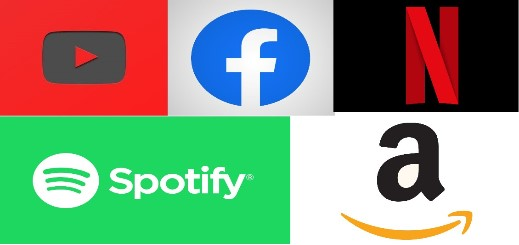

### 1.2. Types of recommendation 
**-** There are basically **three types** of recommender systems:

**Demographic Filtering**: They offer generalized recommendations to every user, based on movie **popularity and/or genre.** The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

**Content Based Filtering**: They suggest similar items based on a particular item. This system uses **item metadata**, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular **item**, he or she will also like an item that is **similar to it.**

**Collaborative Filtering**: This system **matches persons with similar interests** and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.


**In this Project we will handle just with the two first Types Demographic and content Based Filteriing**

### 1.3. Explaning Dataset Features 
**this project contains two datasets which will be merged together.**

**- The first dataset contains the following features:**

**movie_id** : A unique identifier for each movie.

**cast** : The name of lead and supporting actors.

**crew** : The name of Director, Editor, Composer, Writer etc.
      
**- The second dataset has the following features:**

**budget** : The budget in which the movie was made.

**genre** : The genre of the movie, Action, Comedy ,Thriller etc.

**homepage** : A link to the homepage of the movie.

**id** : This is infact the movie_id as in the first dataset.

**keywords** : The keywords or tags related to the movie.

**original_language** : The language in which the movie was made.

**original_title** : The title of the movie before translation or adaptation.

**overview** : A brief description of the movie.

**popularity** : A numeric quantity specifying the movie popularity.

**production_companies** : The production house of the movie.

**production_countries** : The country in which it was produced.

**release_date** : The date on which it was released.

**revenue** : The worldwide revenue generated by the movie.

**runtime** : The running time of the movie in minutes.

**status** : "Released" or "Rumored".

**tagline** : Movie's tagline.

**title** : Title of the movie.

**vote_average** : average ratings the movie recieved.

**vote_count** : the count of votes recieved.

## 2. Loding Dataset

In [1]:
# Importin relevent Libraries 
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

## 3. Exploring the Dataset 

In [3]:
# Showing the Shape of the both Datasets 
print("Credits",df1.shape)
print("Movies",df2.shape)

Credits (4803, 4)
Movies (4803, 20)


In [4]:
# Showing the first Dataset (Credits) 
df1.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [5]:
# Showing the second Dataset (Movies)
df2.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**-** As we cann see, the both Datasets are filled with Numerical and categorical Data . 

**-** Now let's take some Informations about the features through "describe" Function such as average,minimum-maximum value,ect.  

In [8]:
df1.describe()

movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000

In [9]:
df2.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

**-** the next step is to tranform the both datasets into one through **"merge"** function .

In [10]:
 # Renaming the column of credits data set .
df1_renamed=df1.rename(index=str,columns={'movie_id':'id'})
df1_renamed.head(2)

id                                     title  \
0  19995                                    Avatar   
1    285  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [11]:
# Merging both data sets
df_merge=df2.merge(df1_renamed,on='id')
df_merge.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                    title_x vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 23 columns]

## 4. Data preprocessing 

In [12]:
# Finding missing Values
df_merge.isnull().sum().sum()

3941

**-** So in the hole dataset ther are 3941 missing value . 

**-** let's find where they exactly are .

In [13]:
df_merge.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [14]:
# In terms of probability
df_merge.isnull().sum()/len(df_merge)

budget                  0.000000
genres                  0.000000
homepage                0.643556
id                      0.000000
keywords                0.000000
original_language       0.000000
original_title          0.000000
overview                0.000625
popularity              0.000000
production_companies    0.000000
production_countries    0.000000
release_date            0.000208
revenue                 0.000000
runtime                 0.000416
spoken_languages        0.000000
status                  0.000000
tagline                 0.175724
title_x                 0.000000
vote_average            0.000000
vote_count              0.000000
title_y                 0.000000
cast                    0.000000
crew                    0.000000
dtype: float64

**-** As we can see the percentage of missing values is negligible compared to the data as a whole, except the "homepage" which we will remove it because it's considered as irrelevant feature . 

In [15]:
# Number of elements per Category.
print(df_merge['status'].value_counts())

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64


In [16]:
#number of elements of runtime
print(df_merge['runtime'].value_counts())

90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
338.0      1
53.0       1
214.0      1
194.0      1
179.0      1
Name: runtime, Length: 156, dtype: int64


In [17]:
#check if the average of 'runtime' rational or not 
df_merge["runtime"].describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [18]:
# Filling the missing values of "runtime" with the average value 
df_merge['runtime'].fillna(df_merge['runtime'].mean,inplace=True)

In [19]:
df_merge['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

**-** Since that we have a paragraph in which row in the input"overview",so we will fill the missing elements using **TF-IDF** Algorythm(tfidfvectorizer) .

**-** Moreover we will use it for the **Content Based Filtering** 

**TF-IDF in abbreviation (frequency-inverse document frequency):**

It is a numerical statistic that is intended to reflect **how important** a word is to a document in a collection or corpus. It is often used as a **weighting factor** in searches of information retrieval, **text mining**, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

    
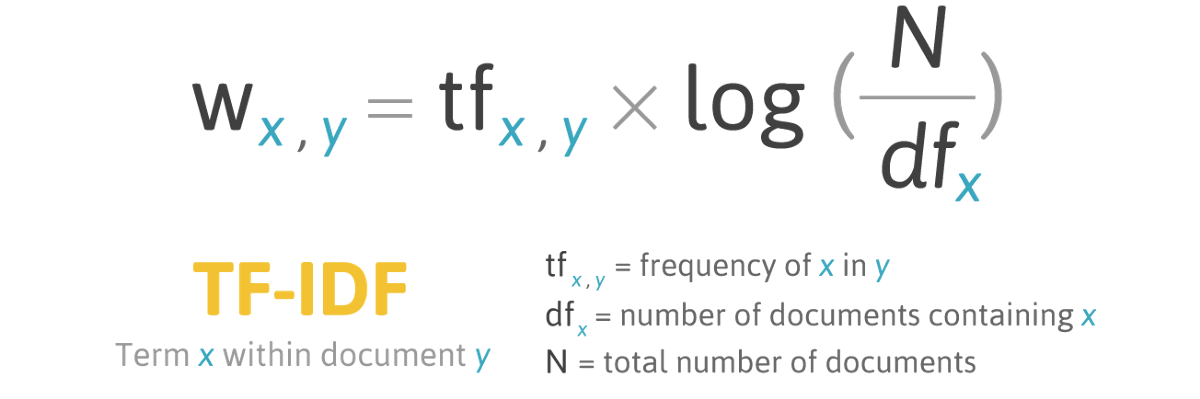

**The more a word present in document the more important it is.     TF ---> Hight**

**The more a element is present in a corpus, the less important it is . IDF ---> Down**


In [20]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,3),min_df=3,analyzer='word')

#Replace NaN with an empty string
df_merge['overview'] = df_merge['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_merge['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 9919)

**-** As a task of Data preprocessing is to remove irrelevent Features .

**-** So in our case we will remove:

   1. **title_x and title_y**: they have exactly the same values as the values of "original_title"
   2. **homepage**: unnecessary feature for our System
   3. **status**: As we can see above this cell, almost the hole elements of 'status' are Released and it's also not relevent for our System.
   4. **production_countries** : unnecessary feature for our System .
   5. **tagline** : unnecessary feature for our System .
        


In [21]:
# Dropping unnecessary columns 
dfm=df_merge.drop(columns=['homepage','title_x','title_y','status','production_countries','tagline'])
dfm.tail(2)

budget                               genres      id  \
4801       0                                   []  126186   
4802       0  [{"id": 99, "name": "Documentary"}]   25975   

                                               keywords original_language  \
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

         original_title                                           overview  \
4801   Shanghai Calling  When ambitious New York attorney Sam is sent t...   
4802  My Date with Drew  Ever since the second grade when he first saw ...   

      popularity                               production_companies  \
4801    0.857008                                                 []   
4802    1.929883  [{"name": "rusty bear entertainment", "id": 87...   

     release_date  revenue runtime                          spoken_languages  \
4801   2012-05-03        0      98  [{"iso_639_1": "en", "name": "English"}]   
4802   2005-08-05        0      90  [{"iso_639_1": "en", "name": "English"}]   

      vote_average  vote_count  \
4801           5.7           7   
4802           6.3          16   

                                                   cast  \
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...

In [22]:
# Verification if they still missing values 
dfm.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
release_date            1
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

## 5. Data Visualisaion 

In [23]:
#importing relevent Libreries for the visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

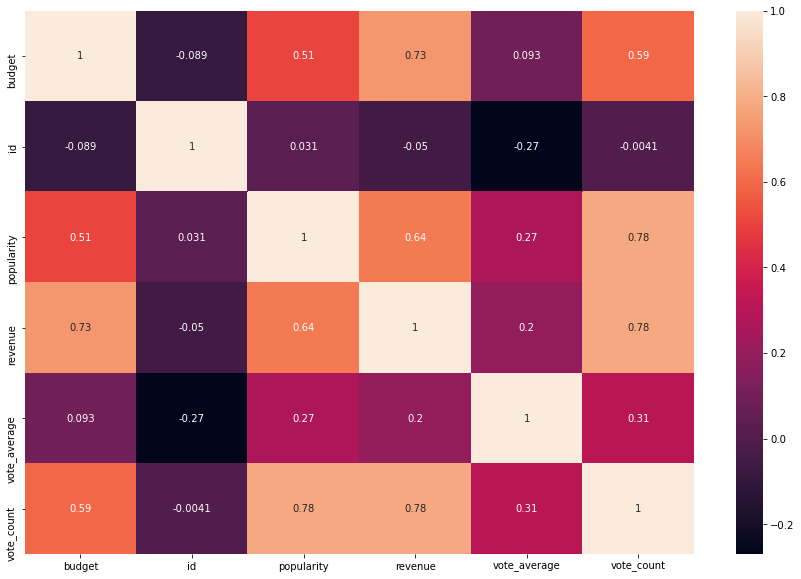

In [24]:
#obtain the correlation matrix between features
correlations = dfm.corr()
f,ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlations,annot=True)

 Through the Heatmap we can conclude the good corrolation between **revenue** and **vote_count** , **popularity** and **value_count** finally between **budget** and **revenue** . 

**Now we will discover Top Movie category**

In [25]:
category = dfm.explode('genres')
category = category.groupby('genres').count()[['id']].reset_index()
category.sort_values(by='id',inplace=True,ascending=False)
category.head()

genres   id
543                      [{"id": 18, "name": "Drama"}]  370
944                     [{"id": 35, "name": "Comedy"}]  282
392  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...  164
833  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...  144
899  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...  142

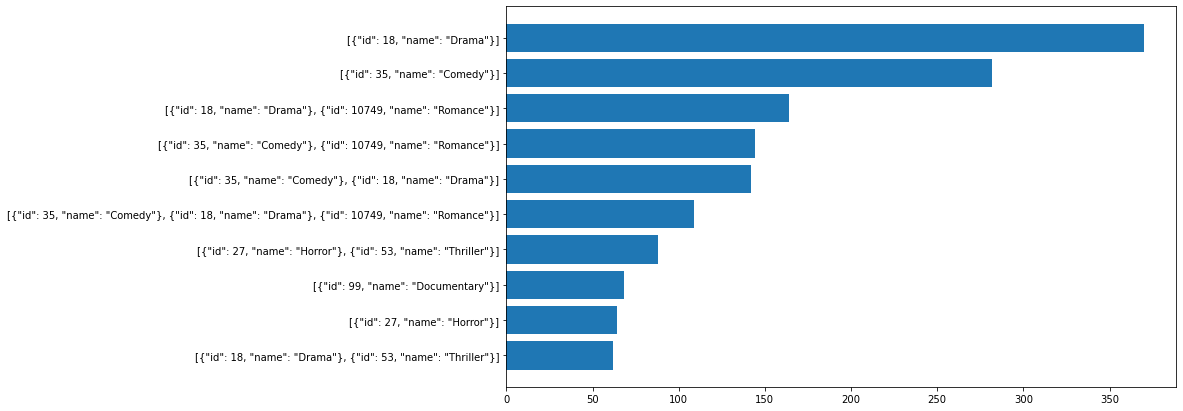

In [26]:
plt.figure(figsize=(12,7))
plt.barh(category.head(10)['genres'][::-1],category.head(10)['id'][::-1])
plt.show()

**Displaying Top 20 movies with highest vote .**

In [27]:
dfm2=dfm.groupby(['original_title'])[['vote_count']].sum()
high_rated=dfm2.nlargest(20,'vote_count')
high_rated.head()

vote_count
original_title             
Inception             13752
The Dark Knight       12002
Avatar                11800
The Avengers          11776
Deadpool              10995

<BarContainer object of 20 artists>

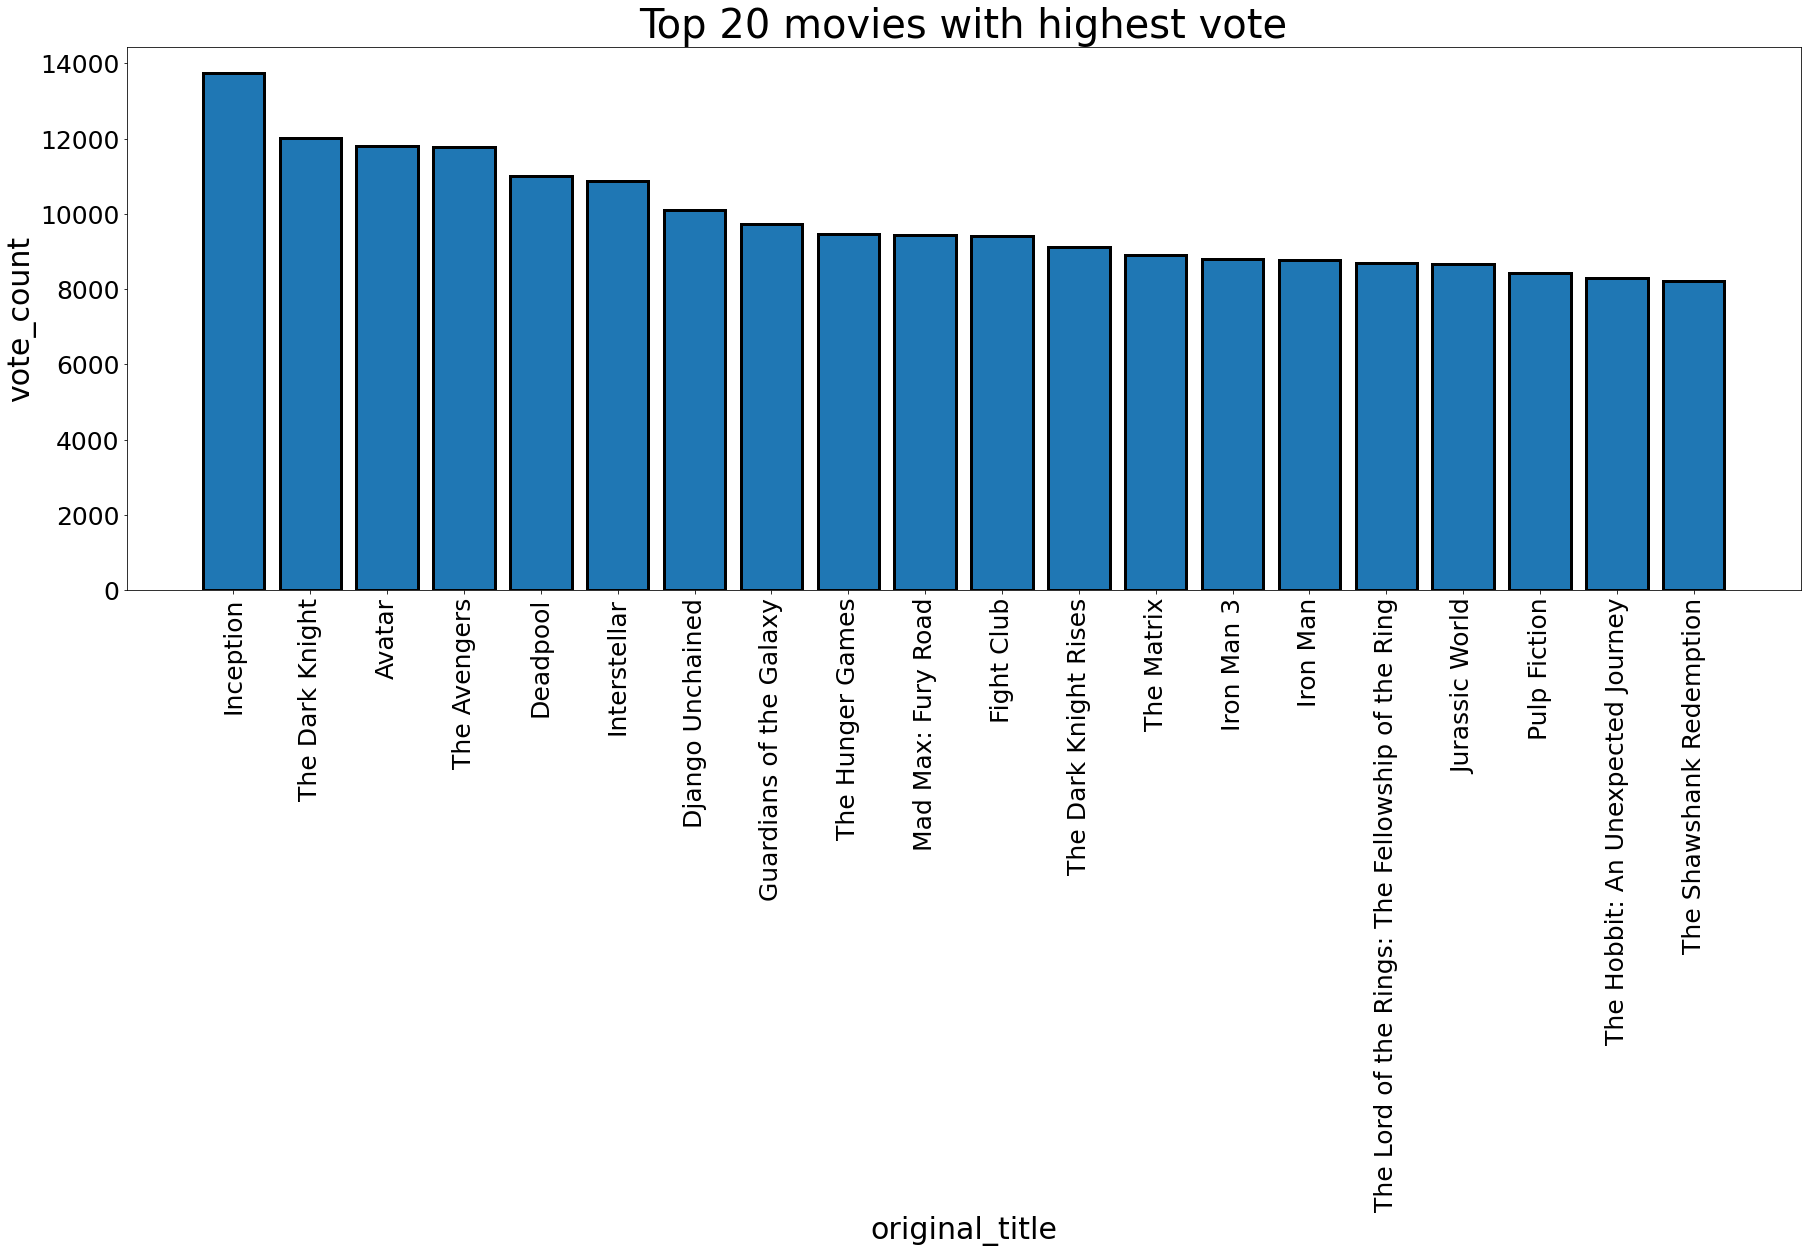

In [28]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest vote',fontsize=40)
plt.ylabel('vote_count',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('original_title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['vote_count'],linewidth=3,edgecolor='black')

**Using profile from pandas for more data exploring and visualisation** 

In [29]:
import pandas_profiling 
from pandas_profiling import ProfileReport

profile = ProfileReport(dfm, title='Pandas Profiling Report')
profile

## 6. Applying Recommendation Types 

### 6.1. Demographic Filtering  

**Remindeing about this Type:**

**-** it offers generalized recommendations to every user, based on movie **popularity and/or genre**

**-** To use this recommender we need to do this Process : 

        1. we need a metric to score or rate movie.
        2. Calculate the score for every movie.
        3. Sort the scores and recommend the best rated movie to the users. 

In [30]:
dfm['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

- **We can use the average ratings(average vote) of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.**

- **So, I'll be using IMDB's weighted rating (wr) which is given as :** 

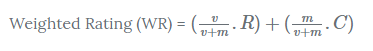

   **v** is the number of votes for the movie.

   **m** is the minimum votes required to be listed in the chart.

   **R** is the average rating of the movie. 

   **C** is the mean vote across the whole report.

- We already have v(vote_count) and R (vote_average) and C can be calculated .

In [31]:
C= df2['vote_average'].mean()
C

6.092171559442011

- as a condition to determine 'm' is : for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [32]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [33]:
# filtering out the movies that qualify for the chart
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 20)

**-** We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [34]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [35]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

**-** Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [36]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

- Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

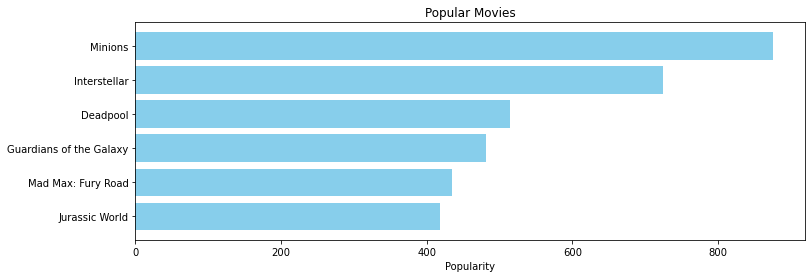

In [37]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

- Here we are done with the first Recommender Type based on movie **popularity** and **rating** !

### 6.2. Content Based Filtering

**Reminding about this Type:**

**-** The general idea behind these recommender systems is that if a person liked a particular **item**(enre, director, description, actors), he or she will also like an item that is **similar to it.**


**-** We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that **similarity score**. The plot description is given in the **overview** feature of our dataset 

**-** Since we have already convert the word vector of each overview on the preprocessing phase, now We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies.

**cosine similarity score**

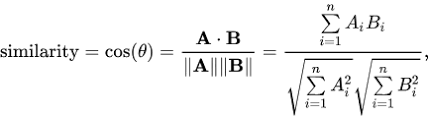

**-** Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster

In [38]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

**-** Now we need mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [39]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

**-** We are now in a good position to define our recommendation function. 

These are the following steps we'll follow :

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [40]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [41]:
get_recommendations('The Dark Knight Rises')

299                              Batman Forever
65                              The Dark Knight
1359                                     Batman
428                              Batman Returns
2507                                  Slow Burn
119                               Batman Begins
1181                                        JFK
3854    Batman: The Dark Knight Returns, Part 2
9            Batman v Superman: Dawn of Justice
210                              Batman & Robin
Name: title, dtype: object

In [42]:
get_recommendations('The Avengers')

256                        Allegiant
3311           Thank You for Smoking
3144                         Plastic
2586                     Firestarter
1715                         Timecop
91      Independence Day: Resurgence
4                        John Carter
4124              This Thing of Ours
7            Avengers: Age of Ultron
3033                   The Corruptor
Name: title, dtype: object

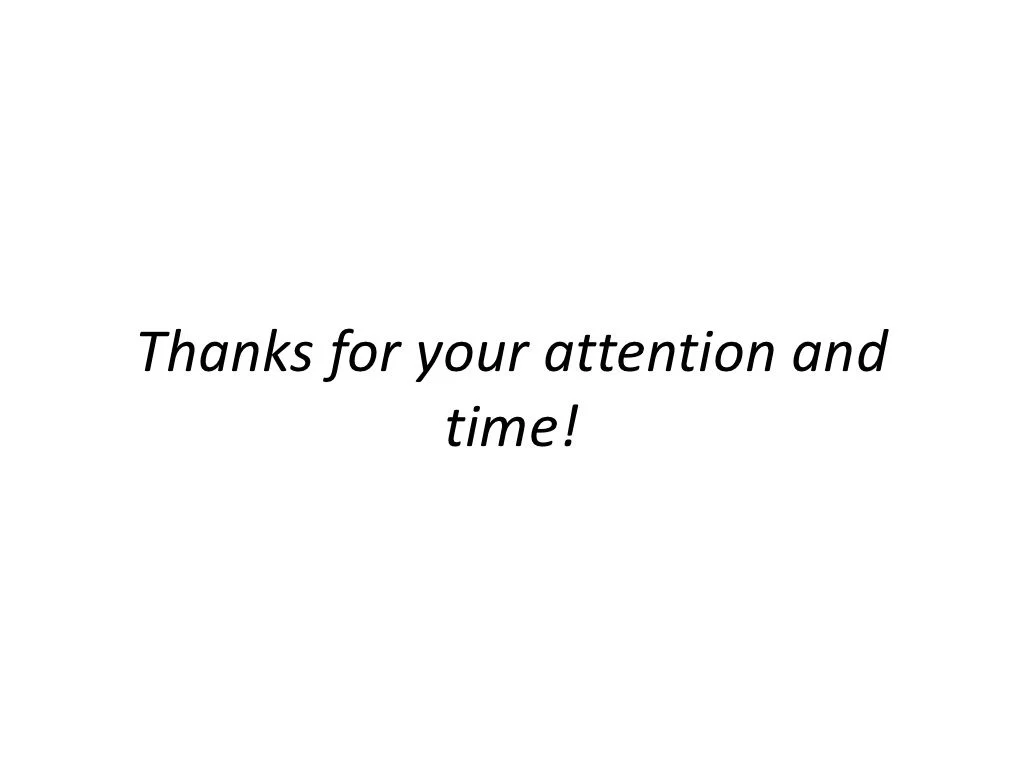